# Face Recognition #7

- We are using: FaceRecs
- We are finding the right ROC point that we want to use
- We are using tolerance = 0.4 and threshold = 0.65

In [22]:
import argparse
import pickle
import cv2
from imutils import paths
import face_recognition
import argparse
import pickle
import cv2
import os
import dlib
import matplotlib.pyplot as plt
import numpy as np
import time
import random

print(dlib.DLIB_USE_CUDA)
#dlib.DLIB_USE_CUDA = True

True


### Identifying parameters
We will indetify the chosen tolerance and threshold.

In [23]:
import json
root_path = "./"
with open( root_path +'labelled_videos.json') as json_file:
    data_json = json.load(json_file)
    
def readTrueName(rec_name):
    if( data_json is None):
        return "Error"
    for real_name in data_json:
        if rec_name in data_json[real_name]:
            return real_name
    return "unknown"

In [24]:
import os
import numpy as np
log_folder = "./logs_0.45/F/"

files = os.listdir(log_folder)


values = [0.20, 0.40, 0.45, 0.55, 0.60, 0.65, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99, 0.9999]
confirmed_rate = np.zeros(len(values))
i = 0

for thr in values:
    total_files = 0
    recognized = 0
    notdetected = 0
    wrong = 0
    wrong_confirmed = 0
    wrong_confirmed2 = 0
    wrong_confirmed3 = 0
    wrong_confirmed4 = 0

    ####
    one_wrong_rec = 0
    persons = 0
    for f in files:
        if( f.startswith('log') == True):
            filev = open(log_folder + f, "r")
            vector = f.split('_')[1].split(".")[0]
            correct_person = readTrueName(vector + ".webm")
            lines = filev.readlines()
            persons += 1
            for line in lines: 
                #we don't want to make statistics on the same person
                name = line.split(' ')[0][:-4] + ".webm"
                if(readTrueName(name) == correct_person):
                    continue

                total_files += 1

                rec_flag = line.split(' ')[2]
                rec_percentage = float(line.split(' ')[3])
                notdec_percentage = float(line.split(' ')[4])
                notrec_percentage = float(line.split(' ')[5])

                recognized = recognized + rec_percentage
                notdetected = notdetected + notdec_percentage
                wrong = wrong + notrec_percentage

                if(notrec_percentage > thr):
                    wrong_confirmed = wrong_confirmed + 1
    
    if(total_files == 0):
        total_files = 1
    confirmed_rate[i] = wrong_confirmed / total_files
    wrong_confirmed = 0
    i = i +1

## equal for each iteration
positive = recognized / total_files 
undetected = notdetected / total_files
negative = wrong / total_files

wrong_rec_on_persons = one_wrong_rec / (persons-1)

In [4]:
import numpy as np
TAR_path = "./logs_0.45/T/"

import os
files = os.listdir(TAR_path)
confirmed_rateT = np.zeros(len(values))
i=0

for thr in values:
    total_files = 0
    recognized = 0
    notdetected = 0
    wrong = 0
    confirmed = 0
    total_files = 0
    
    for f in files:
        if( f.startswith('log') == True):
            filev = open(TAR_path + f, "r")
            lines = filev.readlines()
            for line in lines:
                total_files += 1
                
                try:
                    rec_flag = line.split(' ')[2]
                    rec_percentage = float(line.split(' ')[3])
                    notdec_percentage = float(line.split(' ')[4])
                    notrec_percentage = float(line.split(' ')[5])

                    recognized = recognized + rec_percentage
                    notdetected = notdetected + notdec_percentage
                    wrong = wrong + notrec_percentage
                    if(rec_percentage > thr):
                        confirmed = confirmed + 1
                        
                except IndexError:
                    print(".")

    confirmed_rateT[i] = confirmed / total_files
    
    positive = recognized / total_files 
    undetected = notdetected / total_files
    negative = wrong / total_files
    
    i = i + 1

.
.
.
.
.
.
.
.
.
.
.
.
.


Embeddings train: 20
Embeddings test: 20
Tolerance: 0.45


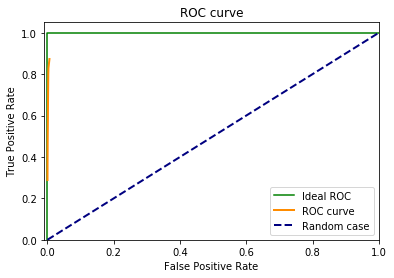

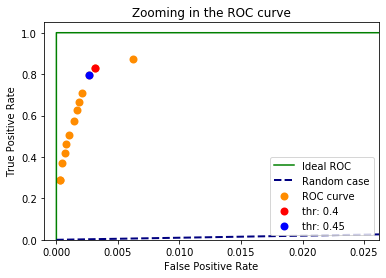

Threshold: 0.2 TAR: 0.8729438083958415 FAR 0.006203724478348665
Threshold: 0.4 TAR: 0.8290564547966838 FAR 0.0031523446264303343
Threshold: 0.45 TAR: 0.7948414265034873 FAR 0.0026250841373120933
Threshold: 0.55 TAR: 0.7112777997104882 FAR 0.0021202602647520754
Threshold: 0.6 TAR: 0.6639689432820108 FAR 0.0018510208660533992
Threshold: 0.65 TAR: 0.6252138439268324 FAR 0.0016603096253085035
Threshold: 0.75 TAR: 0.5756678510330306 FAR 0.0014695983845636079
Threshold: 0.8 TAR: 0.5042768785366496 FAR 0.0010208660533991473
Threshold: 0.85 TAR: 0.4603895249374918 FAR 0.0007852815795378057
Threshold: 0.9 TAR: 0.4201210685616528 FAR 0.0006730984967466906
Threshold: 0.95 TAR: 0.3711672588498487 FAR 0.0004599506394435719
Threshold: 0.99 TAR: 0.2886564021581787 FAR 0.00030289432353601076
Threshold: 0.9999 TAR: 0.2886564021581787 FAR 0.00030289432353601076


In [5]:
from sklearn.metrics import roc_curve, auc
print("Embeddings train: 20")
print("Embeddings test: 20")
print("Tolerance: 0.45")
fpr = confirmed_rate
tpr = confirmed_rateT
exampleX = [0.0, 0.0000001, 0.2, 0.8, 1.0]
exampleY = [0.0, 1.0, 1.0, 1.0, 1.0]
limitx = np.max(fpr)

plt.figure()
lw = 2
plt.plot(exampleX, exampleY, color='green', linestyle='-', label='Ideal ROC')
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random case')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.figure()
lw = 2
plt.plot(exampleX, exampleY, color='green', linestyle='-', label='Ideal ROC')
plt.scatter(fpr, tpr, color='darkorange',lw=lw, label='ROC curve')
plt.scatter(fpr[1], tpr[1], color='red',lw=lw, label='thr: 0.4')
plt.scatter(fpr[2], tpr[2], color='blue',lw=lw, label='thr: 0.45')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random case')
plt.xlim([-0.001, limitx+0.02])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Zooming in the ROC curve')
plt.legend(loc="lower right")
plt.show()

for i in range(len(fpr)):
    print("Threshold:", values[i], "TAR:", tpr[i], "FAR", fpr[i])

We will use this:<br>
Red point ->
Tolerance: 0.45
Threshold: 0.4<br>
TAR: 0.82905 FAR 0.003152

(blue point is -> Tolerance: 0.45
Threshold: 0.45<br>
0.79484 FAR 0.002625)

### Finding False Positive and False Negative
Using the red point (tol = 0.45, thr = 0.4), we will find all the wrong recognized videos.


In [16]:
## false positive (acceptance) (FA)
import os
import numpy as np
log_folder = "./logs_0.45/F/"

files = os.listdir(log_folder)

values = [0.4]
FPfile = open("FP_0.45_0.4.csv", "w")
i = 0

for thr in values:
    total_files = 0
    recognized = 0
    notdetected = 0
    wrong = 0
    wrong_confirmed = 0

    ####
    persons = 0
    for f in files:
        if( f.startswith('log') == True):
            filev = open(log_folder + f, "r")
            vector = f.split('_')[1].split(".")[0]
            FPfile.write(vector + ".webm" + ";")
            correct_person = readTrueName(vector + ".webm")
            lines = filev.readlines()
            persons += 1
            for line in lines: 
                #we don't want to make statistics on the same person
                name = line.split(' ')[0][:-4] + ".webm"
                if(readTrueName(name) == correct_person):
                    continue

                total_files += 1

                rec_flag = line.split(' ')[2]
                rec_percentage = float(line.split(' ')[3])
                notdec_percentage = float(line.split(' ')[4])
                notrec_percentage = float(line.split(' ')[5])

                recognized = recognized + rec_percentage
                notdetected = notdetected + notdec_percentage
                wrong = wrong + notrec_percentage

                if(notrec_percentage > thr):
                    wrong_confirmed = wrong_confirmed + 1
                    FPfile.write(name + ";")
                
            FPfile.write("\n")
    
FPfile.close()

As we can see, just some videos are characterized by false positive. The majority of them depict more than one person in the video, causing confusion to the algorithm that it's looking just for one person.

In [33]:
## false negative (rejection) (FR)
import numpy as np
TAR_path = "./logs_0.45/T+/"

import os
files = os.listdir(TAR_path)
confirmed_rateT = np.zeros(len(values))
i=0

FNfile = open("FN_0.45_0.4.csv", "w")

for thr in values:
    total_files = 0
    recognized = 0
    notdetected = 0
    wrong = 0
    confirmed = 0
    total_files = 0
    train_video = None
    
    for f in files:
        if( f.startswith('log') == True):
            filev = open(TAR_path + f, "r")
            lines = filev.readlines()
            for line in lines:
                total_files += 1
                    
                try:
                    rec_percentage = float(line.split(' ')[3])
                    test_video = line.split(' ')[0][:-4] + ".webm"
                    last_video = train_video
                    train_video = line.split(' ')[1] + ".webm" 
                    
                    if(last_video == None):  # il primo
                        FNfile.write(train_video + ";")
                    if( train_video != last_video):
                        FNfile.write("\n")
                        FNfile.write(train_video + ";")

                    if(rec_percentage > thr):
                        confirmed = confirmed + 1
                    else:
                        FNfile.write(test_video + ";")
                        
                except IndexError:
                    print(line)
    
    i = i + 1
    FNfile.close()

    Create a filter on face crop resolution: if the resolution of a face crop is too low, it will be discarded. The objective here is to find the threshold which maximises the number of wrong decision that are excluded, while minimising the right ones which are excluded (If we can get a curve with a clear inflexion point it would be great). This should allow to improve the algorithm performances

In [29]:
def faceRecognition(image, encodings, detection='cnn', show=False, tolerance = 0.6, min_area = 1):
    start = time.time()
    # the image is already converted in an rgb format
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # format used by openCV
    data = encodings

    # detect the (x, y)-coordinates of the bounding boxes corresponding
    # to each face in the input image, then compute the facial embeddings
    # for each face
    boxes = face_recognition.face_locations(rgb,model=detection)
    encodings = face_recognition.face_encodings(rgb, boxes)
    
    ######################### FACE RESOLUTION LOGIC
    if(len(boxes) > 1):
        #more than one person in the image
        return "discarded"
    
    for face_location in boxes:
        # Print the location of each face in this image
        top, right, bottom, left = face_location
        area_face = (bottom-top) * (right-left)
        area_image = image.shape[0] * image.shape[1]
        ratio = area_face/area_image * 100
        print('face:', area_face, 'image:', area_image, 'ratio:', ratio)
        if (ratio < min_area):
            #discard the picture
            return "discarded"
    #########################

    # initialize the list of names for each face detected
    names = []

    # loop over the facial embeddings
    for encoding in encodings:
        # attempt to match each face in the input image to our known
        # encodings
        matches = face_recognition.compare_faces(data["encodings"], encoding, tolerance = tolerance)
        name = "unknown"

        # check to see if we have found a match
        if True in matches:
            # find the indexes of all matched faces then initialize a
            # dictionary to count the total number of times each face
            # was matched
            matchedIdxs = [i for (i, b) in enumerate(matches) if b]
            counts = {}

            # loop over the matched indexes and maintain a count for
            # each recognized face face
            for i in matchedIdxs:
                name = data["names"][i]
                counts[name] = counts.get(name, 0) + 1

            # determine the recognized face with the largest number of
            # votes (note: in the event of an unlikely tie Python will
            # select first entry in the dictionary)
            name = max(counts, key=counts.get)

        # update the list of names
        try:
            name = name.split('/')[2]
        except:
            name = name
        names.append(name)

    # loop over the recognized faces
    for ((top, right, bottom, left), name) in zip(boxes, names):
        # draw the predicted face name on the image
        cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
        y = top - 15 if top - 15 > 15 else top + 15
        cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,
            0.75, (0, 255, 0), 2)
    
    
    stop = time.time()
    #print('Time needed:', stop-start, 'sec')
    # show the output image
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if(show== True):
        print(names)
        plt.imshow(rgb)
        plt.show()
    return names

def imageRead(path, show=True):
    # BGR FORMAT #
    image = cv2.imread(path)
    
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if(show== True):
        plt.imshow(rgb)
        plt.show()
    return image
    comp
def encodingsRead(path):
    ## PAY ATTENTION:: You need to create the encoding for you dataset using encode_face.py
    data = pickle.loads(open(path, "rb").read())
    return data

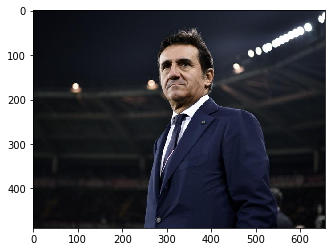

face: 13924 image: 320784 ratio: 4.340615492044491
discarded


In [30]:
enc_path = "../#6/encodings/rec-00f2215a-653a-41b0-a2bd-e081c2644b50-G9pr1rwdts-NHrbOczHA28ELIx0-1582012854590-video-face.pkl"
image = imageRead("./allenatore.jpg", show=True)
encod = encodingsRead(enc_path)
res1 = faceRecognition(image, encod, show=True, tolerance = 0.45, min_area = 5)
print(res1)

face: 13924 image: 320784 ratio: 4.340615492044491
['unknown']


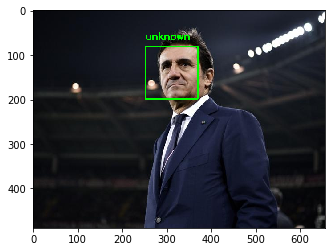

['unknown']


In [31]:
res2 = faceRecognition(image, encod, show=True, tolerance = 0.45, min_area = 1)
print(res2)

This new logic allows to discard the picture that cover less than min_area % of the picture.

The right parameter to use depends of the dataset we are using and on the reliability of the pictures we have.

#### Creating face resolution files
We are now trying to save all the facebox dimension in a separate file for each encoding created. The aim is too run fast the algorithm.

In [20]:
def readFrames(path):

    video = cv2.VideoCapture(path)
    count = 0
    frames = []
    while(1):
        ret, frame = video.read()
        if ret == True:
            frames.append(frame)
            count += 1
        else:
            break

    return frames

In [119]:
def createEncodingsandBoxesFromVector(dataset_vector, name , detection = 'cnn'):

    # grab the paths to the input images in our dataset
    print("[INFO] quantifying faces...")
    '''
    We're going to take only a limit number of images to create the encodings.
    We'll take a random sample over all the images of a person and in particular
    '''
    boxfile = open("./boxes/box_" + name[:-5] + ".pkl", "wb")
    
    if len(dataset_vector )<= 0:
        print("AN ERROR OCCURRED FOR ",name)
        return

    images = random.choices(dataset_vector, k = num, )

    # initialize the list of known encodings and known names
    knownEncodings = []
    knownNames = []
    
    ratios = []
    face_areas = []
    image_areas = []
        
    # loop over the image paths
    for image in images:
        # extract the person name from the image path
        #print("[INFO] processing image {}/{}".format(i + 1,len(imagePaths)))

        # load the input image and convert it from RGB (OpenCV ordering)
        # to dlib ordering (RGB)
        rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # detect the (x, y)-coordinates of the bounding boxes
        # corresponding to each face in the input image
        boxes = face_recognition.face_locations(rgb,model=detection) 

        ######################### FACE RESOLUTION LOGIC
        for face_location in boxes:
            try:
                top, right, bottom, left = face_location
            except IndexError:
                top = right = bottom = left = 0

            area_face = (bottom-top) * (right-left)
            area_image = image.shape[0] * image.shape[1]
            ratio = area_face/area_image * 100
            #print('face:', area_face, 'image:', area_image, 'ratio:', ratio)

            ratios.append(ratio)
            face_areas.append(area_face)
            image_areas.append(area_image)
        #########################
        
        # compute the facial embedding for the face
        encodings = face_recognition.face_encodings(rgb, boxes)

        # loop over the encodings
        for encoding in encodings:
            # add each encoding + name to our set of known names and
            # encodings
            knownEncodings.append(encoding)
            knownNames.append(name)
    #pdb.set_trace()
    
    boxdata = {"ratio": ratios, "face": face_areas, "image": image_areas}
    boxfile.write(pickle.dumps(boxdata))
    boxfile.close()

    
    # dump the facial encodings + names to disk
    print("[INFO] serializing encodings..." + name)
    data = {"encodings": knownEncodings, "names": knownNames}
    file_name = root_path + "encodings_" + str(num) + "/" + name[:-5] + '.pkl'
    
    print(len(knownEncodings))

    log_errors = False
    if( log_errors == True):
        if len(knownEncodings) > 25:
            f = open(root_path + "/encodings_face_videos/" + 'multiple_people.txt', 'a')
            f.write(name + '\n')
            f.close()
        if len(knownEncodings) <= 0:
            f = open(root_path + "/encodings_face_videos/" + 'not_recognisable.txt', 'a')
            f.write(name + '\n')
            f.close()
      

    f = open(file_name, "wb")
    f.write(pickle.dumps(data))
    f.close()

In [ ]:
base_path = "../#6/videos/"
root_path = "./"
videos = os.listdir(base_path)
global_start = time.time()
count = 0
num = 20

count = 0
for video_name in videos:
    count += 1
    if(count < 310):
        continue
    start = time.time()
    frames = readFrames(base_path + video_name)
    createEncodingsandBoxesFromVector(frames, video_name)
    end = time.time()
    print(count/len(videos), 'Time_enc:', end-start)


global_end = time.time()
print('Time_enc:', global_end-global_start)

In [ ]:
target_folder = "./encodings_20/"
files = os.listdir(target_folder)
count = 0
for file in files:
    filewebm = file[:-4] + ".webm"
    print(file)
    print(readTrueName(filewebm))
    if( readTrueName(filewebm) == "unknown"):
        os.remove(target_folder + file)
        count += 1
print(count)

#### Tuning face resolution paramer
Let's now look for the best value for min_area parameter. 


In [25]:
total_ignored = 0
total_frames_ = 0

In [26]:
def faceRecognitionENC(encodings_1, encodings_2, ratio, detection='cnn', show=False, tolerance = 0.6, min_area = 1):
    '''
    It only works with already made encodings
    encodings_1: single encoding of the person we want to recognize
    encodings_2: encodings of the person of which we know the name
    '''
    start = time.time()

    data = encodings_2

    # initialize the list of names for each face detected
    names = []
    
    ######################### FACE RESOLUTION LOGIC
    discarded = "discarded"
    
    if (ratio < min_area):
        #discard the picture
        return discarded
    #########################
    
    # attempt to match each encoding to our known encodings

    matches = face_recognition.compare_faces(data["encodings"],encodings_1, tolerance= tolerance)
    name = "unknown"

    # check to see if we have found a match
    if True in matches:
      # Or instead, use the known face with the smallest distance to the new face
        face_distances = face_recognition.face_distance(data["encodings"], encodings_1)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = data["names"][best_match_index]

    # update the list of names
    try:
        name = name.split('/')[2]
    except:
        name = name
    names.append(name)

    return names
    
def encodingsRead(path):
    data = pickle.loads(open(path, "rb").read())
    return data

def boxesRead(path):
    try:
        data = pickle.loads(open(path, "rb").read())
    except FileNotFoundError:
        boxdata= np.ones(100)
        data = {"ratio": boxdata, "face": boxdata, "image": boxdata}
        print("---- Default box construction")
    return data

In [27]:
def faceRecOnEnc(encoding_path, encodings, correct_person, detection='cnn', min_threshold = 0.85, 
                    max_threshold=0.10, show=False, tolerance = 0.6, stopping_perc = 0.50, min_area = 1):   
    ## encoding_path -> test
    ## encodings -> train
    
    print(correct_person)
    box_path = "./boxes/box_" + correct_person + ".pkl"
    correct_person = readTrueName(correct_person + ".webm")
    encodings_to_compare = encodingsRead(encoding_path)
    boxes_to_compare = boxesRead(box_path)
    encodings_to_compare = encodings_to_compare["encodings"]#ecoding of a different person
    ratio_to_compare = boxes_to_compare['ratio']
    total_frames = len(encodings_to_compare)
    min_frames = total_frames * stopping_perc / 100
    
    analysed_frames = 0
    neutrum_frames = 0
    correct_frames = 0
    negative_frames = 0
    ignored_frames = 0
    global total_ignored
    global total_frames_
    
    start = time.time()
    
    # grab the paths to the input images in our dataset
    print("[INFO] Recognizing faces...")
    total_frames = len(encodings_to_compare)
    print("[INFO] elements:", total_frames)

    #we had some cases where no faces where recognised
    if len(encodings_to_compare) == 0:
        ignored_values_per_person[person_counter] = 0
        person_counter +=1
        return False, 0, 0, 0

    #pdb.set_trace()
    # loop over the encodings
    frame_count = 0
    for enc in encodings_to_compare:
        # extract the person name from the image path
        #print("[INFO] processing image {}/{}".format(i + 1,len(imagePaths)))
        
        ratio = ratio_to_compare[frame_count]
        #image = imageRead(imagePath, show=False)
        person_rec = faceRecognitionENC(enc, encodings, ratio, detection='cnn', tolerance = tolerance, show=show,
                                       min_area = min_area)
        analysed_frames += 1
        frame_count += 1 
        total_frames_ = total_frames_ + 1 #global
        
        if( person_rec == "discarded"):
            # we are ignoring the frame
            analysed_frames -= 1
            ignored_frames += 1 
            print("Discarded frame", frame_count, "ratio:", ratio)
        elif(len(person_rec) >= 1):
            ## modified
            person = readTrueName(person_rec[0])
            if(person == correct_person):
                correct_frames += 1
            else:
                if(person == 'unknown'):
                    neutrum_frames += 1
                else:
                    negative_frames += 1
        else:
            neutrum_frames += 1
        
        
        if( analysed_frames > min_frames and correct_frames/analysed_frames > min_threshold):
            print(correct_person, "Recognized after", analysed_frames, 'with accuracy:', correct_frames/analysed_frames)
            print('Not detected:', neutrum_frames/analysed_frames, ". Wrong recognition:", negative_frames/analysed_frames)
            correct_rate = correct_frames/analysed_frames
            neutrum_rate = neutrum_frames/analysed_frames
            negative_rate = negative_frames/analysed_frames
            total_ignored = total_ignored + ignored_frames
            end = time.time()
            print('Time:', end-start)
            return True, correct_rate, neutrum_rate, negative_rate
        
        if( analysed_frames > min_frames and negative_frames/analysed_frames > min_threshold):
            print(correct_person, "Recognized after", analysed_frames, 'with accuracy:', correct_frames/analysed_frames)
            print('Not detected:', neutrum_frames/analysed_frames, ". Wrong recognition:", negative_frames/analysed_frames)
            correct_rate = correct_frames/analysed_frames
            neutrum_rate = neutrum_frames/analysed_frames
            negative_rate = negative_frames/analysed_frames
            total_ignored = total_ignored + ignored_frames
            end = time.time()
            print('Time:', end-start)
            return True, correct_rate, neutrum_rate, negative_rate
        
        if( analysed_frames > min_frames and (negative_frames+correct_frames)/analysed_frames < max_threshold):
            print(correct_person, "Recognized after", analysed_frames, 'with accuracy:', correct_frames/analysed_frames)
            print('Not detected:', neutrum_frames/analysed_frames, ". Wrong recognition:", negative_frames/analysed_frames)
            correct_rate = correct_frames/analysed_frames
            neutrum_rate = neutrum_frames/analysed_frames
            negative_rate = negative_frames/analysed_frames
            total_ignored = total_ignored + ignored_frames
            end = time.time()
            print('Time:', end-start)
            return False, correct_rate, neutrum_rate, negative_rate
        
        #########################

    #for ends
    if(total_frames == 0 or analysed_frames == 0):
        total_frames = 1
        analysed_frames = 1
    correct_rate = correct_frames/analysed_frames
    neutrum_rate = neutrum_frames/analysed_frames
    negative_rate = negative_frames/analysed_frames
    total_ignored = total_ignored + ignored_frames   
    end = time.time()
    print(correct_person, "Recognized after", analysed_frames, 'with accuracy:', correct_frames/total_frames)
    print('Not detected:', neutrum_frames/total_frames, ". Wrong recognition:", negative_frames/total_frames)
    print('Time:', end-start)
    if(correct_rate > min_threshold - 0.05):
        return True, correct_rate, neutrum_rate, negative_rate
    else:
        return False, correct_rate, neutrum_rate, negative_rate

In [28]:

def performCrossedTestENC(min_v=0, max_v=1000, false_threshold=0.10, true_threshold=0.85, log=False,
                          tolerance = 0.6, min_area = 1):
    csv = False
    stop_percentage = 40
    print("-------------------------")
    print("TEST STARTED")
    print("-------------------------")
    start = time.time()
    count = 0
    enc_list = os.listdir(encodings_folder)
    test_dir = os.listdir(test_path)
    
    csv_folder_base = root_path
    f = open(csv_folder_base +'CrossTest' + str(tolerance) +'.csv', 'w')

    if (csv == True and f != None):
        writer = csv.writer(f)

    p_count = 0
    for encoding in enc_list:
        start_2 = time.time()    
        p_count += 1
        if( p_count > testing_limit):
            break
        count = count + 1
        if(count < min_v):
            continue
        if(count > max_v):
            break

        enc_name = encoding[0:len(encoding)-4]#removing '.pkl' from name
        encoding_path = encodings_folder + encoding
        print('[ENC] Using encoding:', enc_name)
        start_2 = time.time()
        curr_encoding = encodingsRead(encoding_path)

        if( log == True ):
            logs_folder = "./logs_" + str(tolerance) + key + "/F/"
            logfile = open(logs_folder + "log_" + enc_name + ".txt", "w")
            
        row = []
        row.append(enc_name)
        for person in test_dir:    
            if ( readTrueName(enc_name +".webm") == readTrueName(person[0:len(person)-4] +".webm") ):#removing '.pkl' from name 
                continue

            test_enc = test_path + person            
            person_name = person[0:len(person)-4]
            print('Testing on test encoding:', person)

            # test the encodings of testset               
            v, a, b, c = faceRecOnEnc(test_enc, curr_encoding, person_name, min_threshold=true_threshold,
                                         max_threshold = false_threshold, tolerance = tolerance, 
                                         stopping_perc = stop_percentage, min_area = min_area, show=False)
            if (v == True):
                row.append(person)
            if(log== True):
                line = person + " " + "0" + " " + str(v) + " " + str(a) + " " + str(b) + " " + str(c) + "\n"
                logfile.write(line)
                
        #FINE DELLA PERSONA
        if(log == True):
            logfile.close()        
        if( csv == True):
            #writing on the csv the line of all the videos in which the èerson is recognised
            writer.writerow(row)
            
        
        end_2 = time.time()    
        print("-------------------------")
        print('The comparison last:', end_2-start_2)
        print("-------------------------")
    
    end = time.time()
    print("-------------------------")
    print("TEST ENDED")
    print("-------------------------")
    print('This test last:', end-start)
    f.close()
    return

In [29]:
testing_limit = 100000
def performTestENC(min_v=0, max_v=1000, false_threshold=0.10, true_threshold=0.85, log=False, tolerance = 0.6,
                  min_area = 1):
    csv = False
    stop_percentage = 40
    logplus = False
    print("-------------------------")
    print("TEST STARTED")
    print("-------------------------")
    start = time.time()
    count = 0
    enc_list = os.listdir(encodings_folder)
    test_dir = os.listdir(test_path)
    
    csv_folder_base = root_path
    f = open(csv_folder_base +'CrossTest' + str(tolerance) +'.csv', 'w')

    if (csv == True and f != None):
        writer = csv.writer(f)
    if( log == True ):
        logs_folder = "./logs_" + str(tolerance) + key + "/T/"
        #logs_folder = "./logs/T/"
        logfile = open(logs_folder + "log_" + str(min_v) + "_" + str(max_v) + ".txt", "w")
    if (logplus == True):
        fileplus = open("./fileplus.txt", "w")

    p_count = 0
    for encoding in enc_list:
        start_2 = time.time()    
        p_count += 1
        if( p_count > testing_limit):
            break
        count = count + 1
        if(count < min_v):
            continue
        if(count > max_v):
            break

        enc_name = encoding[0:len(encoding)-4]#removing '.pkl' from name
        encoding_path = encodings_folder + encoding
        print('[ENC] Using encoding:', enc_name)
        start_2 = time.time()
        curr_encoding = encodingsRead(encoding_path)
            
        row = []
        row.append(enc_name)
        t_count = 0
        for person in test_dir:    
            if ( readTrueName(enc_name +".webm") != readTrueName(person[0:len(person)-4] +".webm") ):#removing '.pkl' from name 
                continue

            test_enc = test_path + person            
            person_name = person[0:len(person)-4]
            print('Testing on test encoding:', person)

            # test the encodings of testset               
            v, a, b, c = faceRecOnEnc(test_enc, curr_encoding, person_name, min_threshold=true_threshold,
                                         max_threshold = false_threshold, tolerance = tolerance, 
                                         stopping_perc = stop_percentage,  min_area = min_area, show=False)
            
            if (v == True):
                row.append(person)
            if(log== True):
                line = person + " " + str(t_count) + " " + str(v) + " " + str(a) + " " + str(b) + " " + str(c) + "\n"
                logfile.write(line)
            if(logplus == True):
                line = person + " " + enc_name + " " + str(v) + " " + str(a) + " " + str(b) + " " + str(c) + "\n"
                fileplus.write(line)
            t_count += 1
                
        if( csv == True):
            #writing on the csv the line of all the videos in which the èerson is recognised
            writer.writerow(row)
            
        
        end_2 = time.time()    
        print("-------------------------")
        print('The comparison last:', end_2-start_2)
        print("-------------------------")
    #FINE DELLA PERSONA
    if(log == True):
        logfile.close() 
    if(logplus == True):
        fileplus.close()
    
    end = time.time()
    print("-------------------------")
    print("TEST ENDED")
    print("-------------------------")
    print('This test last:', end-start)
    f.close()
    return

#### Running tests
Let's run different test with plausible min_area values.

In [13]:
encodings_folder = "./encodings_20/"
test_path = "./encodings_20/"
key = "_area1"

In [ ]:
# min_area = 1 %
performTestENC(min_v=0, max_v=1000, false_threshold=0.1, true_threshold=0.4, tolerance = 0.45, min_area=1, log=True)
performCrossedTestENC(min_v=0, max_v=1000, false_threshold=0.1, true_threshold=0.4, tolerance = 0.45, min_area=1, log=True)

Percentage of overall images that were discarded: 0.14151622261656616


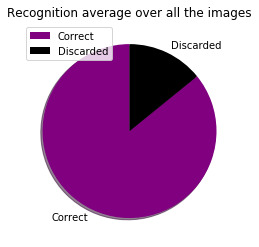

In [273]:
# discarded 205510
discarded = 205510/total_frames_
labels = ['Correct', 'Discarded']
colors = ['Purple', 'Black']
sizes1 = [(1-discarded), discarded]
print('Percentage of overall images that were discarded:', discarded)

plt.pie(sizes1, labels=labels, shadow=True, startangle=90, colors=colors)
plt.title('Recognition average over all the images')
plt.legend()
plt.show()


In [242]:
import os
import numpy as np
log_folder = "./logs_0.45_area1/F/"

files = os.listdir(log_folder)


values = [0.20, 0.40, 0.45, 0.55, 0.60, 0.65, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99, 0.9999]
confirmed_rate = np.zeros(len(values))
i = 0

for thr in values:
    total_files = 0
    recognized = 0
    notdetected = 0
    wrong = 0
    wrong_confirmed = 0
    wrong_confirmed2 = 0
    wrong_confirmed3 = 0
    wrong_confirmed4 = 0

    ####
    one_wrong_rec = 0
    persons = 0
    for f in files:
        if( f.startswith('log') == True):
            filev = open(log_folder + f, "r")
            vector = f.split('_')[1].split(".")[0]
            correct_person = readTrueName(vector + ".webm")
            lines = filev.readlines()
            persons += 1
            for line in lines: 
                #we don't want to make statistics on the same person
                name = line.split(' ')[0] + ".webm"
                if(readTrueName(name) == correct_person):
                    continue

                total_files += 1

                rec_flag = line.split(' ')[2]
                rec_percentage = float(line.split(' ')[3])
                notdec_percentage = float(line.split(' ')[4])
                notrec_percentage = float(line.split(' ')[5])

                recognized = recognized + rec_percentage
                notdetected = notdetected + notdec_percentage
                wrong = wrong + notrec_percentage

                if(notrec_percentage > thr):
                    wrong_confirmed = wrong_confirmed + 1
    
    if(total_files == 0):
        total_files = 1
    confirmed_rate[i] = wrong_confirmed / total_files
    wrong_confirmed = 0
    i = i +1

## equal for each iteration
positive = recognized / total_files 
undetected = notdetected / total_files
negative = wrong / total_files

wrong_rec_on_persons = one_wrong_rec / (persons-1)

In [243]:
import numpy as np
TAR_path = "./logs_0.45_area1/T/"

import os
files = os.listdir(TAR_path)
confirmed_rateT = np.zeros(len(values))
i=0

for thr in values:
    total_files = 0
    recognized = 0
    notdetected = 0
    wrong = 0
    confirmed = 0
    total_files = 0
    
    for f in files:
        if( f.startswith('log') == True):
            filev = open(TAR_path + f, "r")
            lines = filev.readlines()
            for line in lines:
                total_files += 1
                
                try:
                    rec_flag = line.split(' ')[2]
                    rec_percentage = float(line.split(' ')[3])
                    notdec_percentage = float(line.split(' ')[4])
                    notrec_percentage = float(line.split(' ')[5])

                    recognized = recognized + rec_percentage
                    notdetected = notdetected + notdec_percentage
                    wrong = wrong + notrec_percentage
                    if(rec_percentage > thr):
                        confirmed = confirmed + 1
                        
                except IndexError:
                    print(line)

    confirmed_rateT[i] = confirmed / total_files
    
    positive = recognized / total_files 
    undetected = notdetected / total_files
    negative = wrong / total_files
    
    i = i + 1

Embeddings train: 20
Embeddings test: 50
Tolerance: 0.55


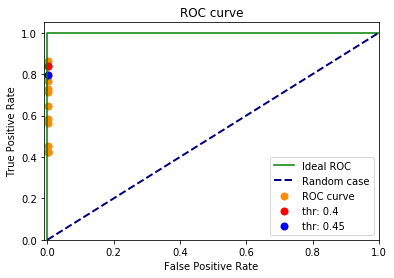

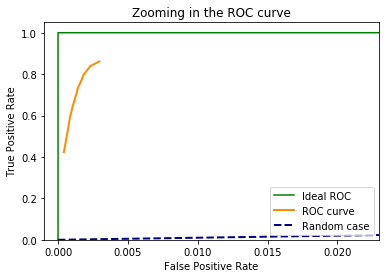

Threshold: 0.4 TAR: 0.8388307327671342 FAR 0.002310971505496971


In [244]:
from sklearn.metrics import roc_curve, auc
print("Embeddings train: 20")
print("Embeddings test: 20")
print("Tolerance: 0.45")
fpr = confirmed_rate
tpr = confirmed_rateT
exampleX = [0.0, 0.0000001, 0.2, 0.8, 1.0]
exampleY = [0.0, 1.0, 1.0, 1.0, 1.0]
limitx = np.max(fpr)

plt.figure()
lw = 2
plt.plot(exampleX, exampleY, color='green', linestyle='-', label='Ideal ROC')
plt.scatter(fpr, tpr, color='darkorange',lw=lw, label='ROC curve')
plt.scatter(fpr[1], tpr[1], color='red',lw=lw, label='thr: 0.4')
plt.scatter(fpr[2], tpr[2], color='blue',lw=lw, label='thr: 0.45')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random case')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.figure()
lw = 2
plt.plot(exampleX, exampleY, color='green', linestyle='-', label='Ideal ROC')
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random case')
plt.xlim([-0.001, limitx+0.02])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Zooming in the ROC curve')
plt.legend(loc="lower right")
plt.show()

print("Threshold:", values[1], "TAR:", tpr[1], "FAR", fpr[1])

In [ ]:
# min_area = 1.5 %
total_frames_ = 0
key = "_area1.5"
performTestENC(min_v=0, max_v=1000, false_threshold=0.1, true_threshold=0.4, tolerance = 0.45, min_area=1.5, log=True)
performCrossedTestENC(min_v=0, max_v=1000, false_threshold=0.1, true_threshold=0.4, tolerance = 0.45, min_area=1.5, log=True)

Discarded 283490
Percentage of overall images that were discarded: 0.21059520687716035


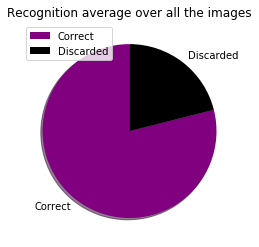

In [31]:
# tutti i test sono 1452201, le ignorate 435014
print('Discarded', total_ignored)
discarded = total_ignored/total_frames_
labels = ['Correct', 'Discarded']
colors = ['Purple', 'Black']
sizes1 = [(1-discarded), discarded]
print('Percentage of overall images that were discarded:', discarded)

plt.pie(sizes1, labels=labels, shadow=True, startangle=90, colors=colors)
plt.title('Recognition average over all the images')
plt.legend()
plt.show()

In [32]:
import os
import numpy as np
log_folder = "./logs_0.45_area1.5/F/"

files = os.listdir(log_folder)


values = [0.20, 0.40, 0.45, 0.55, 0.60, 0.65, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99, 0.9999]
confirmed_rate = np.zeros(len(values))
i = 0

for thr in values:
    total_files = 0
    recognized = 0
    notdetected = 0
    wrong = 0
    wrong_confirmed = 0
    wrong_confirmed2 = 0
    wrong_confirmed3 = 0
    wrong_confirmed4 = 0

    ####
    one_wrong_rec = 0
    persons = 0
    for f in files:
        if( f.startswith('log') == True):
            filev = open(log_folder + f, "r")
            vector = f.split('_')[1].split(".")[0]
            correct_person = readTrueName(vector + ".webm")
            lines = filev.readlines()
            persons += 1
            for line in lines: 
                #we don't want to make statistics on the same person
                name = line.split(' ')[0] + ".webm"
                if(readTrueName(name) == correct_person):
                    continue

                total_files += 1

                rec_flag = line.split(' ')[2]
                rec_percentage = float(line.split(' ')[3])
                notdec_percentage = float(line.split(' ')[4])
                notrec_percentage = float(line.split(' ')[5])

                recognized = recognized + rec_percentage
                notdetected = notdetected + notdec_percentage
                wrong = wrong + notrec_percentage

                if(notrec_percentage > thr):
                    wrong_confirmed = wrong_confirmed + 1
    
    if(total_files == 0):
        total_files = 1
    confirmed_rate[i] = wrong_confirmed / total_files
    wrong_confirmed = 0
    i = i +1

## equal for each iteration
positive = recognized / total_files 
undetected = notdetected / total_files
negative = wrong / total_files

wrong_rec_on_persons = one_wrong_rec / (persons-1)

In [33]:
import numpy as np
TAR_path = "./logs_0.45_area1.5/T/"

import os
files = os.listdir(TAR_path)
confirmed_rateT = np.zeros(len(values))
i=0

for thr in values:
    total_files = 0
    recognized = 0
    notdetected = 0
    wrong = 0
    confirmed = 0
    total_files = 0
    
    for f in files:
        if( f.startswith('log') == True):
            filev = open(TAR_path + f, "r")
            lines = filev.readlines()
            for line in lines:
                total_files += 1
                
                try:
                    rec_flag = line.split(' ')[2]
                    rec_percentage = float(line.split(' ')[3])
                    notdec_percentage = float(line.split(' ')[4])
                    notrec_percentage = float(line.split(' ')[5])

                    recognized = recognized + rec_percentage
                    notdetected = notdetected + notdec_percentage
                    wrong = wrong + notrec_percentage
                    if(rec_percentage > thr):
                        confirmed = confirmed + 1
                        
                except IndexError:
                    print(line)

    confirmed_rateT[i] = confirmed / total_files
    
    positive = recognized / total_files 
    undetected = notdetected / total_files
    negative = wrong / total_files
    
    i = i + 1

Embeddings train: 20
Embeddings test: 20
Tolerance: 0.45


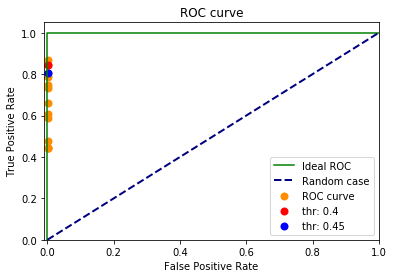

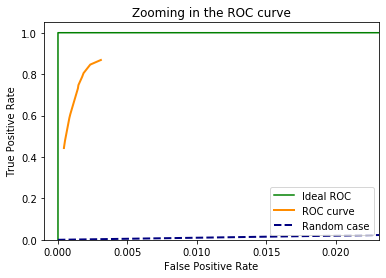

Threshold: 0.4 TAR: 0.8460728158535783 FAR 0.0023221898137760827


In [34]:
from sklearn.metrics import roc_curve, auc
print("Embeddings train: 20")
print("Embeddings test: 20")
print("Tolerance: 0.45")
fpr = confirmed_rate
tpr = confirmed_rateT
exampleX = [0.0, 0.0000001, 0.2, 0.8, 1.0]
exampleY = [0.0, 1.0, 1.0, 1.0, 1.0]
limitx = np.max(fpr)

plt.figure()
lw = 2
plt.plot(exampleX, exampleY, color='green', linestyle='-', label='Ideal ROC')
plt.scatter(fpr, tpr, color='darkorange',lw=lw, label='ROC curve')
plt.scatter(fpr[1], tpr[1], color='red',lw=lw, label='thr: 0.4')
plt.scatter(fpr[2], tpr[2], color='blue',lw=lw, label='thr: 0.45')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random case')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.figure()
lw = 2
plt.plot(exampleX, exampleY, color='green', linestyle='-', label='Ideal ROC')
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random case')
plt.xlim([-0.001, limitx+0.02])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Zooming in the ROC curve')
plt.legend(loc="lower right")
plt.show()

print("Threshold:", values[1], "TAR:", tpr[1], "FAR", fpr[1])

In [ ]:
# min_area = 2 %
total_frames_ = 0
key = "_area2"
performTestENC(min_v=0, max_v=1000, false_threshold=0.1, true_threshold=0.4, tolerance = 0.45, min_area=2, log=True)
performCrossedTestENC(min_v=0, max_v=1000, false_threshold=0.1, true_threshold=0.4, tolerance = 0.45, min_area=2, log=True)

Discarded 2737392
Percentage of overall images that were discarded: 0.25


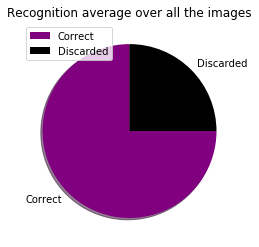

In [320]:
# tutti i test sono 1452201, le ignorate 435014
print('Discarded', total_ignored)
discarded = total_ignored/total_frames_
labels = ['Correct', 'Discarded']
colors = ['Purple', 'Black']
sizes1 = [(1-discarded), discarded]
print('Percentage of overall images that were discarded:', discarded)

plt.pie(sizes1, labels=labels, shadow=True, startangle=90, colors=colors)
plt.title('Recognition average over all the images')
plt.legend()
plt.show()


In [316]:
import os
import numpy as np
log_folder = "./logs_0.45_area2/F/"

files = os.listdir(log_folder)


values = [0.20, 0.40, 0.45, 0.55, 0.60, 0.65, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99, 0.9999]
confirmed_rate = np.zeros(len(values))
i = 0

for thr in values:
    total_files = 0
    recognized = 0
    notdetected = 0
    wrong = 0
    wrong_confirmed = 0
    wrong_confirmed2 = 0
    wrong_confirmed3 = 0
    wrong_confirmed4 = 0

    ####
    one_wrong_rec = 0
    persons = 0
    for f in files:
        if( f.startswith('log') == True):
            filev = open(log_folder + f, "r")
            vector = f.split('_')[1].split(".")[0]
            correct_person = readTrueName(vector + ".webm")
            lines = filev.readlines()
            persons += 1
            for line in lines: 
                #we don't want to make statistics on the same person
                name = line.split(' ')[0] + ".webm"
                if(readTrueName(name) == correct_person):
                    continue

                total_files += 1

                rec_flag = line.split(' ')[2]
                rec_percentage = float(line.split(' ')[3])
                notdec_percentage = float(line.split(' ')[4])
                notrec_percentage = float(line.split(' ')[5])

                recognized = recognized + rec_percentage
                notdetected = notdetected + notdec_percentage
                wrong = wrong + notrec_percentage

                if(notrec_percentage > thr):
                    wrong_confirmed = wrong_confirmed + 1
    
    if(total_files == 0):
        total_files = 1
    confirmed_rate[i] = wrong_confirmed / total_files
    wrong_confirmed = 0
    i = i +1

## equal for each iteration
positive = recognized / total_files 
undetected = notdetected / total_files
negative = wrong / total_files

wrong_rec_on_persons = one_wrong_rec / (persons-1)

In [317]:
import numpy as np
TAR_path = "./logs_0.45_area2/T/"

import os
files = os.listdir(TAR_path)
confirmed_rateT = np.zeros(len(values))
i=0

for thr in values:
    total_files = 0
    recognized = 0
    notdetected = 0
    wrong = 0
    confirmed = 0
    total_files = 0
    
    for f in files:
        if( f.startswith('log') == True):
            filev = open(TAR_path + f, "r")
            lines = filev.readlines()
            for line in lines:
                total_files += 1
                
                try:
                    rec_flag = line.split(' ')[2]
                    rec_percentage = float(line.split(' ')[3])
                    notdec_percentage = float(line.split(' ')[4])
                    notrec_percentage = float(line.split(' ')[5])

                    recognized = recognized + rec_percentage
                    notdetected = notdetected + notdec_percentage
                    wrong = wrong + notrec_percentage
                    if(rec_percentage > thr):
                        confirmed = confirmed + 1
                        
                except IndexError:
                    print(line)

    confirmed_rateT[i] = confirmed / total_files
    
    positive = recognized / total_files 
    undetected = notdetected / total_files
    negative = wrong / total_files
    
    i = i + 1

Embeddings train: 20
Embeddings test: 20
Tolerance: 0.45


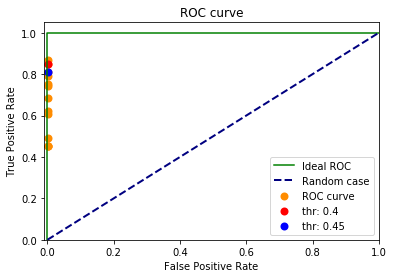

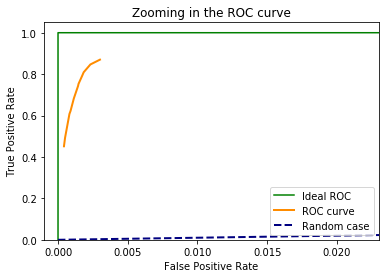

Threshold: 0.4 TAR: 0.8467970241622227 FAR 0.0023221898137760827


In [318]:
from sklearn.metrics import roc_curve, auc
print("Embeddings train: 20")
print("Embeddings test: 20")
print("Tolerance: 0.45")
fpr = confirmed_rate
tpr = confirmed_rateT
exampleX = [0.0, 0.0000001, 0.2, 0.8, 1.0]
exampleY = [0.0, 1.0, 1.0, 1.0, 1.0]
limitx = np.max(fpr)

plt.figure()
lw = 2
plt.plot(exampleX, exampleY, color='green', linestyle='-', label='Ideal ROC')
plt.scatter(fpr, tpr, color='darkorange',lw=lw, label='ROC curve')
plt.scatter(fpr[1], tpr[1], color='red',lw=lw, label='thr: 0.4')
plt.scatter(fpr[2], tpr[2], color='blue',lw=lw, label='thr: 0.45')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random case')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.figure()
lw = 2
plt.plot(exampleX, exampleY, color='green', linestyle='-', label='Ideal ROC')
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random case')
plt.xlim([-0.001, limitx+0.02])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Zooming in the ROC curve')
plt.legend(loc="lower right")
plt.show()

print("Threshold:", values[1], "TAR:", tpr[1], "FAR", fpr[1])

In [ ]:
# min_area = 2.5%
total_frames_=0
key = "_area2.5"
performTestENC(min_v=0, max_v=1000, false_threshold=0.1, true_threshold=0.50, tolerance = 0.45, min_area=2.5, log=True)
performCrossedTestENC(min_v=0, max_v=1000, false_threshold=0.1, true_threshold=0.50, tolerance = 0.45, min_area=2.5, log=True)

Discarded 352980
Percentage of overall images that were discarded: 0.25099800470167943


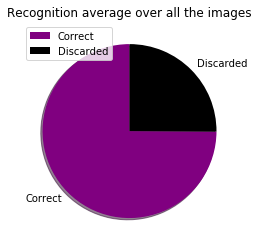

In [17]:
# tutti i test sono 1452201, le ignorate 435014
print('Discarded', total_ignored)
discarded = total_ignored/total_frames_
labels = ['Correct', 'Discarded']
colors = ['Purple', 'Black']
sizes1 = [(1-discarded), discarded]
print('Percentage of overall images that were discarded:', discarded)

plt.pie(sizes1, labels=labels, shadow=True, startangle=90, colors=colors)
plt.title('Recognition average over all the images')
plt.legend()
plt.show()


In [18]:
import os
import numpy as np
log_folder = "./logs_0.45_area2.5/F/"

files = os.listdir(log_folder)


values = [0.20, 0.40, 0.45, 0.55, 0.60, 0.65, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99, 0.9999]
confirmed_rate = np.zeros(len(values))
i = 0

for thr in values:
    total_files = 0
    recognized = 0
    notdetected = 0
    wrong = 0
    wrong_confirmed = 0
    wrong_confirmed2 = 0
    wrong_confirmed3 = 0
    wrong_confirmed4 = 0

    ####
    one_wrong_rec = 0
    persons = 0
    for f in files:
        if( f.startswith('log') == True):
            filev = open(log_folder + f, "r")
            vector = f.split('_')[1].split(".")[0]
            correct_person = readTrueName(vector + ".webm")
            lines = filev.readlines()
            persons += 1
            for line in lines: 
                #we don't want to make statistics on the same person
                name = line.split(' ')[0] + ".webm"
                if(readTrueName(name) == correct_person):
                    continue

                total_files += 1

                rec_flag = line.split(' ')[2]
                rec_percentage = float(line.split(' ')[3])
                notdec_percentage = float(line.split(' ')[4])
                notrec_percentage = float(line.split(' ')[5])

                recognized = recognized + rec_percentage
                notdetected = notdetected + notdec_percentage
                wrong = wrong + notrec_percentage

                if(notrec_percentage > thr):
                    wrong_confirmed = wrong_confirmed + 1
    
    if(total_files == 0):
        total_files = 1
    confirmed_rate[i] = wrong_confirmed / total_files
    wrong_confirmed = 0
    i = i +1

## equal for each iteration
positive = recognized / total_files 
undetected = notdetected / total_files
negative = wrong / total_files

wrong_rec_on_persons = one_wrong_rec / (persons-1)

In [19]:
import numpy as np
TAR_path = "./logs_0.45_area2.5/T/"

import os
files = os.listdir(TAR_path)
confirmed_rateT = np.zeros(len(values))
i=0

for thr in values:
    total_files = 0
    recognized = 0
    notdetected = 0
    wrong = 0
    confirmed = 0
    total_files = 0
    
    for f in files:
        if( f.startswith('log') == True):
            filev = open(TAR_path + f, "r")
            lines = filev.readlines()
            for line in lines:
                total_files += 1
                
                try:
                    rec_flag = line.split(' ')[2]
                    rec_percentage = float(line.split(' ')[3])
                    notdec_percentage = float(line.split(' ')[4])
                    notrec_percentage = float(line.split(' ')[5])

                    recognized = recognized + rec_percentage
                    notdetected = notdetected + notdec_percentage
                    wrong = wrong + notrec_percentage
                    if(rec_percentage > thr):
                        confirmed = confirmed + 1
                        
                except IndexError:
                    print(line)

    confirmed_rateT[i] = confirmed / total_files
    
    positive = recognized / total_files 
    undetected = notdetected / total_files
    negative = wrong / total_files
    
    i = i + 1

Embeddings train: 20
Embeddings test: 20
Tolerance: 0.45


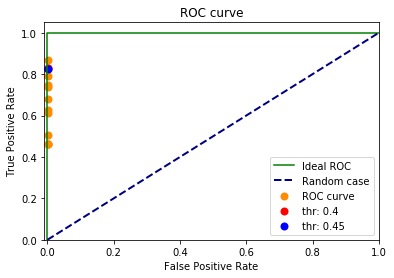

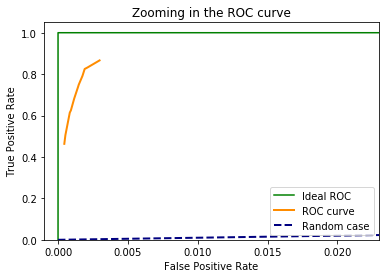

Threshold: 0.4 TAR: 0.8316544867996577 FAR 0.0020978236481938523


In [20]:
from sklearn.metrics import roc_curve, auc
print("Embeddings train: 20")
print("Embeddings test: 20")
print("Tolerance: 0.45")
fpr = confirmed_rate
tpr = confirmed_rateT
exampleX = [0.0, 0.0000001, 0.2, 0.8, 1.0]
exampleY = [0.0, 1.0, 1.0, 1.0, 1.0]
limitx = np.max(fpr)

plt.figure()
lw = 2
plt.plot(exampleX, exampleY, color='green', linestyle='-', label='Ideal ROC')
plt.scatter(fpr, tpr, color='darkorange',lw=lw, label='ROC curve')
plt.scatter(fpr[1], tpr[1], color='red',lw=lw, label='thr: 0.4')
plt.scatter(fpr[2], tpr[2], color='blue',lw=lw, label='thr: 0.45')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random case')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.figure()
lw = 2
plt.plot(exampleX, exampleY, color='green', linestyle='-', label='Ideal ROC')
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random case')
plt.xlim([-0.001, limitx+0.02])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Zooming in the ROC curve')
plt.legend(loc="lower right")
plt.show()

print("Threshold:", values[1], "TAR:", tpr[1], "FAR", fpr[1])

In [ ]:
# min_area = 3%
total_frames_=0
key = "_area3"
performTestENC(min_v=0, max_v=1000, false_threshold=0.1, true_threshold=0.50, tolerance = 0.45, min_area=3, log=True)
performCrossedTestENC(min_v=0, max_v=1000, false_threshold=0.1, true_threshold=0.50, tolerance = 0.45, min_area=3, log=True)

In [327]:
import os
import numpy as np
log_folder = "./logs_0.45_area3/F/"

files = os.listdir(log_folder)


values = [0.20, 0.40, 0.45, 0.55, 0.60, 0.65, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99, 0.9999]
confirmed_rate = np.zeros(len(values))
i = 0

for thr in values:
    total_files = 0
    recognized = 0
    notdetected = 0
    wrong = 0
    wrong_confirmed = 0
    wrong_confirmed2 = 0
    wrong_confirmed3 = 0
    wrong_confirmed4 = 0

    ####
    one_wrong_rec = 0
    persons = 0
    for f in files:
        if( f.startswith('log') == True):
            filev = open(log_folder + f, "r")
            vector = f.split('_')[1].split(".")[0]
            correct_person = readTrueName(vector + ".webm")
            lines = filev.readlines()
            persons += 1
            for line in lines: 
                #we don't want to make statistics on the same person
                name = line.split(' ')[0] + ".webm"
                if(readTrueName(name) == correct_person):
                    continue

                total_files += 1

                rec_flag = line.split(' ')[2]
                rec_percentage = float(line.split(' ')[3])
                notdec_percentage = float(line.split(' ')[4])
                notrec_percentage = float(line.split(' ')[5])

                recognized = recognized + rec_percentage
                notdetected = notdetected + notdec_percentage
                wrong = wrong + notrec_percentage

                if(notrec_percentage > thr):
                    wrong_confirmed = wrong_confirmed + 1
    
    if(total_files == 0):
        total_files = 1
    confirmed_rate[i] = wrong_confirmed / total_files
    wrong_confirmed = 0
    i = i +1

## equal for each iteration
positive = recognized / total_files 
undetected = notdetected / total_files
negative = wrong / total_files

wrong_rec_on_persons = one_wrong_rec / (persons-1)

In [328]:
import numpy as np
TAR_path = "./logs_0.45_area3/T/"

import os
files = os.listdir(TAR_path)
confirmed_rateT = np.zeros(len(values))
i=0

for thr in values:
    total_files = 0
    recognized = 0
    notdetected = 0
    wrong = 0
    confirmed = 0
    total_files = 0
    
    for f in files:
        if( f.startswith('log') == True):
            filev = open(TAR_path + f, "r")
            lines = filev.readlines()
            for line in lines:
                total_files += 1
                
                try:
                    rec_flag = line.split(' ')[2]
                    rec_percentage = float(line.split(' ')[3])
                    notdec_percentage = float(line.split(' ')[4])
                    notrec_percentage = float(line.split(' ')[5])

                    recognized = recognized + rec_percentage
                    notdetected = notdetected + notdec_percentage
                    wrong = wrong + notrec_percentage
                    if(rec_percentage > thr):
                        confirmed = confirmed + 1
                        
                except IndexError:
                    print(line)

    confirmed_rateT[i] = confirmed / total_files
    
    positive = recognized / total_files 
    undetected = notdetected / total_files
    negative = wrong / total_files
    
    i = i + 1

Embeddings train: 20
Embeddings test: 20
Tolerance: 0.45


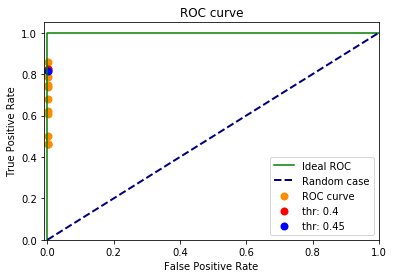

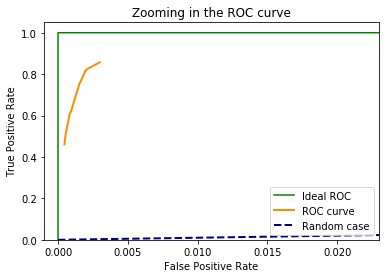

Threshold: 0.4 TAR: 0.8250707749028903 FAR 0.002109041956472964


In [329]:
from sklearn.metrics import roc_curve, auc
print("Embeddings train: 20")
print("Embeddings test: 20")
print("Tolerance: 0.45")
fpr = confirmed_rate
tpr = confirmed_rateT
exampleX = [0.0, 0.0000001, 0.2, 0.8, 1.0]
exampleY = [0.0, 1.0, 1.0, 1.0, 1.0]
limitx = np.max(fpr)

plt.figure()
lw = 2
plt.plot(exampleX, exampleY, color='green', linestyle='-', label='Ideal ROC')
plt.scatter(fpr, tpr, color='darkorange',lw=lw, label='ROC curve')
plt.scatter(fpr[1], tpr[1], color='red',lw=lw, label='thr: 0.4')
plt.scatter(fpr[2], tpr[2], color='blue',lw=lw, label='thr: 0.45')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random case')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.figure()
lw = 2
plt.plot(exampleX, exampleY, color='green', linestyle='-', label='Ideal ROC')
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random case')
plt.xlim([-0.001, limitx+0.02])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Zooming in the ROC curve')
plt.legend(loc="lower right")
plt.show()

print("Threshold:", values[1], "TAR:", tpr[1], "FAR", fpr[1])

In [ ]:
# min_area = 5%
total_frames_=0
key = "_area5"
performTestENC(min_v=0, max_v=1000, false_threshold=0.1, true_threshold=0.50, tolerance = 0.45, min_area=5, log=True)
performCrossedTestENC(min_v=0, max_v=1000, false_threshold=0.1, true_threshold=0.50, tolerance = 0.45, min_area=5, log=True)

In [ ]:
# tutti i test sono 5022253, le ignorate 2420866
print('Discarded', total_ignored)
discarded = total_ignored/total_frames_
labels = ['Correct', 'Discarded']
colors = ['Purple', 'Black']
sizes1 = [(1-discarded), discarded]
print('Percentage of overall images that were discarded:', discarded)

plt.pie(sizes1, labels=labels, shadow=True, startangle=90, colors=colors)
plt.title('Recognition average over all the images')
plt.legend()
plt.show()

In [303]:
import os
import numpy as np
log_folder = "./logs_0.45_area5/F/"

files = os.listdir(log_folder)


values = [0.20, 0.40, 0.45, 0.55, 0.60, 0.65, 0.75, 0.80, 0.85, 0.90, 0.95, 0.99, 0.9999]
confirmed_rate = np.zeros(len(values))
i = 0

for thr in values:
    total_files = 0
    recognized = 0
    notdetected = 0
    wrong = 0
    wrong_confirmed = 0
    wrong_confirmed2 = 0
    wrong_confirmed3 = 0
    wrong_confirmed4 = 0

    ####
    one_wrong_rec = 0
    persons = 0
    for f in files:
        if( f.startswith('log') == True):
            filev = open(log_folder + f, "r")
            vector = f.split('_')[1].split(".")[0]
            correct_person = readTrueName(vector + ".webm")
            lines = filev.readlines()
            persons += 1
            for line in lines: 
                #we don't want to make statistics on the same person
                name = line.split(' ')[0] + ".webm"
                if(readTrueName(name) == correct_person):
                    continue

                total_files += 1

                rec_flag = line.split(' ')[2]
                rec_percentage = float(line.split(' ')[3])
                notdec_percentage = float(line.split(' ')[4])
                notrec_percentage = float(line.split(' ')[5])

                recognized = recognized + rec_percentage
                notdetected = notdetected + notdec_percentage
                wrong = wrong + notrec_percentage

                if(notrec_percentage > thr):
                    wrong_confirmed = wrong_confirmed + 1
    
    if(total_files == 0):
        total_files = 1
    confirmed_rate[i] = wrong_confirmed / total_files
    wrong_confirmed = 0
    i = i +1

## equal for each iteration
positive = recognized / total_files 
undetected = notdetected / total_files
negative = wrong / total_files

wrong_rec_on_persons = one_wrong_rec / (persons-1)

In [305]:
import numpy as np
TAR_path = "./logs_0.45_area5/T/"

import os
files = os.listdir(TAR_path)
confirmed_rateT = np.zeros(len(values))
i=0

for thr in values:
    total_files = 0
    recognized = 0
    notdetected = 0
    wrong = 0
    confirmed = 0
    total_files = 0
    
    for f in files:
        if( f.startswith('log') == True):
            filev = open(TAR_path + f, "r")
            lines = filev.readlines()
            for line in lines:
                total_files += 1
                
                try:
                    rec_flag = line.split(' ')[2]
                    rec_percentage = float(line.split(' ')[3])
                    notdec_percentage = float(line.split(' ')[4])
                    notrec_percentage = float(line.split(' ')[5])

                    recognized = recognized + rec_percentage
                    notdetected = notdetected + notdec_percentage
                    wrong = wrong + notrec_percentage
                    if(rec_percentage > thr):
                        confirmed = confirmed + 1
                        
                except IndexError:
                    print(line)

    confirmed_rateT[i] = confirmed / total_files
    
    positive = recognized / total_files 
    undetected = notdetected / total_files
    negative = wrong / total_files
    
    i = i + 1

Embeddings train: 20
Embeddings test: 20
Tolerance: 0.45


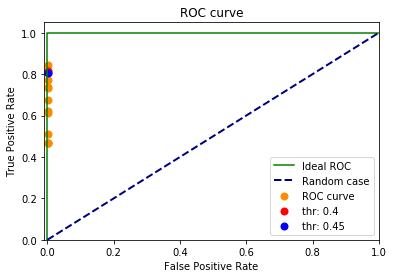

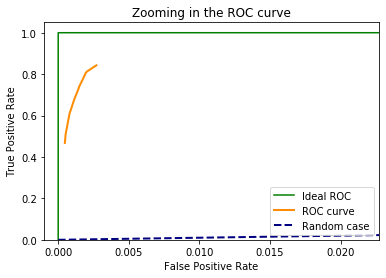

Threshold: 0.4 TAR: 0.8128909078938705 FAR 0.0020417321067982947


In [306]:
from sklearn.metrics import roc_curve, auc
print("Embeddings train: 20")
print("Embeddings test: 20")
print("Tolerance: 0.45")
fpr = confirmed_rate
tpr = confirmed_rateT
exampleX = [0.0, 0.0000001, 0.2, 0.8, 1.0]
exampleY = [0.0, 1.0, 1.0, 1.0, 1.0]
limitx = np.max(fpr)

plt.figure()
lw = 2
plt.plot(exampleX, exampleY, color='green', linestyle='-', label='Ideal ROC')
plt.scatter(fpr, tpr, color='darkorange',lw=lw, label='ROC curve')
plt.scatter(fpr[1], tpr[1], color='red',lw=lw, label='thr: 0.4')
plt.scatter(fpr[2], tpr[2], color='blue',lw=lw, label='thr: 0.45')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random case')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

plt.figure()
lw = 2
plt.plot(exampleX, exampleY, color='green', linestyle='-', label='Ideal ROC')
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Random case')
plt.xlim([-0.001, limitx+0.02])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Zooming in the ROC curve')
plt.legend(loc="lower right")
plt.show()

print("Threshold:", values[1], "TAR:", tpr[1], "FAR", fpr[1])

In [ ]:
# min_area = 8 % ######
total_frames_= 0
key = "_area8"
performTestENC(min_v=0, max_v=1000, false_threshold=0.1, true_threshold=0.4, tolerance = 0.45, min_area=8, log=True)
performCrossedTestENC(min_v=0, max_v=1000, false_threshold=0.1, true_threshold=0.4, tolerance = 0.45, min_area=8, log=True)